## Exploratory&nbsp;Data&nbsp;Analysis&nbsp;for&nbsp;Hollywood&nbsp;Most&nbsp;Profitable&nbsp;Stories

### Overview of the Dataset

- Let's import the required libraries for the project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

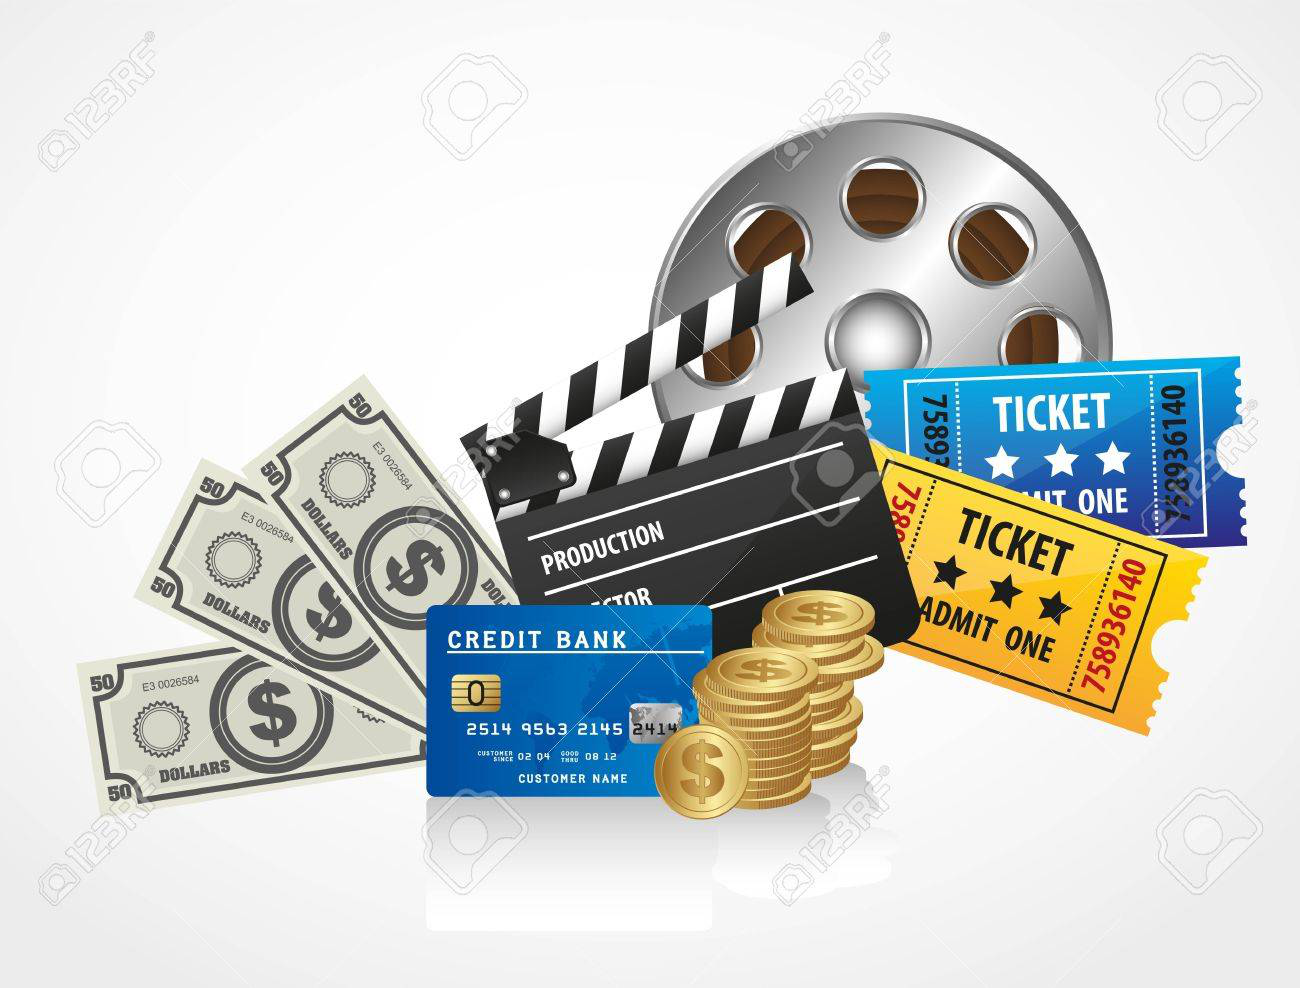

In [ ]:
# Let's import the project's cover image
from PIL import Image
image = Image.open("imagen_hollywood.jpg")
image.show()

- Let's import the file and read it. 

In [ ]:
df = pd.read_csv('/work/HollywoodsMostProfitableStories.csv')
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [ ]:
            df.shape

(74, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead Studio        73 non-null     object 
 3   Audience  score %  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  73 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


- 8 columns and 74 rows. 
- 3 categorical variables (film, genre, lead studio) and 5 numeric variables (audience score, profitability, rotten tomatoes, worldwide gross and year).
- Numeric variables could be grouped into categories for further analysis.
- Some of the columns seem to have null values. Let's see that with more detail.

- Let's now check for null values in our dataset

In [ ]:
df.isnull().sum()

Film                 0
Genre                0
Lead Studio          1
Audience  score %    1
Profitability        3
Rotten Tomatoes %    1
Worldwide Gross      0
Year                 0
dtype: int64

- 4 of the columns have null values. Some work is needed to fix that.

- Let's see unique values for every column

In [ ]:
df.nunique()

Film                 74
Genre                 6
Lead Studio          13
Audience  score %    40
Profitability        71
Rotten Tomatoes %    49
Worldwide Gross      74
Year                  5
dtype: int64

- So, we have 74 different movie titles, 6 genres, 13 movie studios, 40 different scores, 71 profitability scores, 49 rotten tomatoes scores, 74 gross profit quantities and 5 years. 

- Let's se now basic statistics for the numeric variables

In [ ]:
df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
count,73.000000,71.000000,73.000000,74.000000,74.000000
mean,64.136986,4.741610,47.356164,136.351979,2009.054054
std,13.647665,8.292017,26.242655,157.067561,1.353756
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,52.000000,1.790680,27.000000,32.447500,2008.000000
50%,64.000000,2.642353,45.000000,73.198612,2009.000000
75%,76.000000,4.850958,65.000000,190.185250,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


- Column profitability and Worldwide Gross seem to be the columns that contain outliers for high values as mean is considarable higher than median in both cases. 
- Further analysis is required.

### Missing Values

- Let's check now the missing values for every column.

In [ ]:
df[df['Lead Studio'].isnull()]

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
38,No Reservations,Comedy,NaN,64.0,3.30718,39.0,92.60105,2007


- It's the only null value for this column, which still has lot of useful information. We may leave it as it is. 

In [ ]:
df[df['Audience  score %'].isnull()]

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
50,Something Borrowed,Romance,Independent,NaN,1.719514,NaN,60.183,2011


- This row has two missing values: Audience Score % and Rotten Tomatoes. And both are important  to analyse ratings. 
- Still, row has plenty of information and we should keep it. 
- No need to check on Rotten Tomatoes column, as we already have its missing value here.

In [ ]:
df[df['Profitability'].isnull()]

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
18,Jane Eyre,Romance,Universal,77.0,NaN,85.0,30.147,2011
41,Our Family Wedding,Comedy,Independent,49.0,NaN,14.0,21.370,2010
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040,2010


- This column has null values for three different rows, but all other values are ok in all three columns. We better keep these rows.

## Analysis

### Genre

- Let's check on the genre variable

In [ ]:
df['Genre'].value_counts()

Comedy       41
Romance      15
Drama        13
Animation     3
Action        1
Fantasy       1
Name: Genre, dtype: int64

In [ ]:
df['Genre'].value_counts(normalize=True)

Comedy       0.554054
Romance      0.202703
Drama        0.175676
Animation    0.040541
Action       0.013514
Fantasy      0.013514
Name: Genre, dtype: float64

- 6 different movie genres, looks good to group by in our anlaysis. 
- Comedy is the unquestioned leader with 55%. Romance (20%) and drama (17%) follow far behind. 

- Let's see how this looks like in a histogram.

In [ ]:
fig = px.histogram(df, x='Genre', title='Genre', color='Genre')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

### Lead Studio

In [ ]:
df['Lead Studio'].value_counts()

Independent              19
Warner Bros.             12
Universal                 7
Disney                    7
Fox                       6
Summit                    5
Paramount                 4
Sony                      4
The Weinstein Company     3
20th Century Fox          2
Lionsgate                 2
New Line                  1
CBS                       1
Name: Lead Studio, dtype: int64

In [ ]:
df['Lead Studio'].value_counts(normalize=True)

Independent              0.260274
Warner Bros.             0.164384
Universal                0.095890
Disney                   0.095890
Fox                      0.082192
Summit                   0.068493
Paramount                0.054795
Sony                     0.054795
The Weinstein Company    0.041096
20th Century Fox         0.027397
Lionsgate                0.027397
New Line                 0.013699
CBS                      0.013699
Name: Lead Studio, dtype: float64

- Quite a few studios, not great but still useful to group by.
- A bit surprising the prevalence of independent studios in a profit rank, beating giants as Warner, Universal, Disney, etc. This requires further analysis. 

- Let's see how this looks like in a histogram.

In [ ]:
fig = px.histogram(df, x='Lead Studio', title='Lead Studios')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

### Audience  Score %

- Acording to data set description on Kaggle, audience score represents the percentage of viewers that liked the movie.   

- Let's see now our first numeric variable

In [ ]:
df['Audience  score %'].describe()

count    73.000000
mean     64.136986
std      13.647665
min      35.000000
25%      52.000000
50%      64.000000
75%      76.000000
max      89.000000
Name: Audience  score %, dtype: float64

- As for its mean and median (both 64) audience score seems normal distributed.

In [ ]:
fig = px.histogram(df, x='Audience  score %', title='Percentage of Audience  Score %', 
marginal='box' )
fig.show()

- As expected, distribution looks pretty normal.
- Data was distributed in 5 value regular intervals. 

### Profitability

- Acording to data set description on Kaggle, profitability is in terms of how much money the movies made. But it's not clear if it's in millions and what currency exactly. Still, we have the idea, the highest the value, the greatest financial success.  

In [ ]:
df['Profitability'].describe()

count    71.000000
mean      4.741610
std       8.292017
min       0.005000
25%       1.790680
50%       2.642353
75%       4.850958
max      66.934000
Name: Profitability, dtype: float64

- Based on mean and median this distribution looks rightly skewed. Let's visualize it.

In [ ]:
fig = px.histogram(df, x='Profitability', title='Profitability of Films', marginal='box', 
hover_data = df[['Film','Genre', 'Year']])

fig.show()

- As expected, distribution is highly right skewed, due to a few high outliers.
- Movies like Fireproof and High School Musical have the greatest profitabilies.

### Rotten Tomatoes %

- Rotten Tomatoes is a website that provides movies and tv shows scores based on the opinion of film and tv critics. The score represents the percentage of professional critic reviews that are positive for a given film or television show. Let's check the behavior of this variable for the movies on our dataset.

In [ ]:
df['Rotten Tomatoes %'].describe()

count    73.000000
mean     47.356164
std      26.242655
min       3.000000
25%      27.000000
50%      45.000000
75%      65.000000
max      96.000000
Name: Rotten Tomatoes %, dtype: float64

- Mean is a bit higher than median, we may have a slightly right skewed. 
- The minimum value here is 3% (!) in contrast to the audience score which is 35%. Indeed, film critics can be ruthless.  

In [ ]:
fig = px.histogram(df, x=df['Rotten Tomatoes %'], title='Rotten Tomatoes Scores', marginal='box',
hover_data = df[['Film','Genre', 'Year']])
fig.show()

- Distribution slightly right skewed.

### Worldwide Gross

- According to data set description on Kaggle, this column refers to the money films made worlwide. Let's check it. 

In [ ]:
df['Worldwide Gross'].describe()

count     74.000000
mean     136.351979
std      157.067561
min        0.025000
25%       32.447500
50%       73.198612
75%      190.185250
max      709.820000
Name: Worldwide Gross, dtype: float64

- As mean is more than doble than median we´ll have a highly right skewed distribution, with high outliers. 
- Also, differences between min value and max value are enormous. It looks like some films were succesfull only in the US. Let's see. 

In [ ]:
fig = px.histogram(df, x='Worldwide Gross', title= 'Worldwide Gross of Movies', marginal='box',
hover_data = df[['Film','Genre', 'Year']])
fig.show()

- As expected, distribution is rigthly skewed with big outliers on the right. 
- It looks like the Twilight saga was a global hit!

### Correlations

Let's see now how the numeric variables on our dataset correlate to one another. 

In [ ]:
df[['Audience  score %', 'Profitability', 'Rotten Tomatoes %', 'Worldwide Gross']].corr()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
Audience score %,1.000000,0.042083,0.601990,0.395357
Profitability,0.042083,1.000000,0.024210,0.146705
Rotten Tomatoes %,0.601990,0.024210,1.000000,0.019748
Worldwide Gross,0.395357,0.146705,0.019748,1.000000


In [ ]:
fig = px.scatter_matrix(df, dimensions=['Audience  score %', 'Profitability', 'Rotten Tomatoes %', 'Worldwide Gross'], 
color='Genre', title='Correlations', opacity=0.6, width=800, height=800, 
hover_data=['Film', 'Lead Studio'])
fig.show()

- Only Audience Score % and Rotten Tomatoes have a moderate positive correlation (0.60).
- Worldwide Gross and Audience Score have a weak positive correlation (0.39)

## Behavior Over Time

### Genre by Year

In [ ]:
genre_by_year = df.groupby(['Year', 'Genre'])[['Genre']].count().reset_index(level=0).rename(
    columns={'Genre':'Genre Count'})
genre_by_year

,Year,Genre Count
Genre,,
Comedy,2007,6
Romance,2007,5
Animation,2008,1
Comedy,2008,12
Drama,2008,3
Fantasy,2008,1
Romance,2008,2
Comedy,2009,7
Drama,2009,5


In [ ]:
fig = px.histogram(df, x='Year', color='Genre')
fig.show()

- Comedy genre is by far the most popular every year, with the exception of 2011.
- Between two and five genres per year. We don't have a year with all genre movies  

### Lead Studios by year

- Let's see now the lead studio variable, where independent studios seem to outperform the big ones

Let's first check how many films each studio had over the years

In [ ]:
# groupby to count number of films per studio per year
lead_studio_by_year = df.groupby(['Year', 'Lead Studio'])[['Film']].count()
lead_studio_by_year.reset_index(inplace=True)
print(lead_studio_by_year.head())

# create pivot table using groupby recentely created
film_count_by_year_studio = lead_studio_by_year.pivot(index='Year', columns='Lead Studio',
 values='Film')
film_count_by_year_studio.fillna(0, inplace=True)
film_count_by_year_studio

   Year  Lead Studio  Film
0  2007       Disney     1
1  2007  Independent     4
2  2007    Lionsgate     1
3  2007    Paramount     1
4  2007    Universal     1


Lead Studio,20th Century Fox,CBS,Disney,Fox,Independent,Lionsgate,New Line,Paramount,Sony,Summit,The Weinstein Company,Universal,Warner Bros.
Year,,,,,,,,,,,,,
2007,0.0,0.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
2008,0.0,0.0,2.0,3.0,3.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0
2009,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,3.0
2010,0.0,1.0,2.0,2.0,4.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,3.0
2011,2.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


- Let's now see number of films per studio per year. 

In [ ]:
fig = px.bar(film_count_by_year_studio, barmode='group')
fig.show()

- Independent studios have more films at least in three out of all five years. 
- Independent films seem to have experienced considerable increases in the last two years. 

- Let's now try another visual for the same variable, using percentage of films per studio.

In [ ]:
film_relative_pivot = film_count_by_year_studio.T
film_relative = film_relative_pivot.divide(film_relative_pivot.sum())
fig1 = px.bar(film_relative.T, barmode='relative')
fig1.show()

- Let's now check the profitability variable

### Profitability

- Let's first check profit per lead studio, to see which one has been the most succesful.

- Total profit per studio 

In [ ]:
# groupby to create profit data frame and check profit totals per year, genre, studio and film 
profit_all = df.groupby(['Year', 'Lead Studio', 'Genre', 'Film'])[['Profitability']].sum()
profit_all.reset_index(inplace=True)
profit_all.sort_values(by='Profitability', ascending=False).head(10)

,Year,Lead Studio,Genre,Film,Profitability
16,2008,Independent,Drama,Fireproof,66.934000
11,2008,Disney,Comedy,High School Musical 3: Senior Year,22.913136
34,2009,Summit,Drama,The Twilight Saga: New Moon,14.196400
4,2007,Independent,Romance,Waitress,11.089742
23,2008,Summit,Romance,Twilight,10.180027
25,2008,Universal,Comedy,Mamma Mia!,9.234454
69,2011,Sony,Romance,Midnight in Paris,8.744706
30,2009,Fox,Comedy,(500) Days of Summer,8.096000
29,2009,Disney,Comedy,The Proposal,7.867500
27,2008,Warner Bros.,Comedy,Sex and the City,7.221796


- there is an unusually high value for the film Death Proof. According to Wikipedia, the film was a sleeper hit (In the entertainment industry, a sleeper hit is a film, television series, music release, video game, or some other entertainment product that was initially unsuccessful on release but becomes a success later on).
- This will make it hard to see profitability variable clearly for the rest of data set. So, let's exclude it form our analysis. 

In [ ]:
profit = profit_all.drop(16)
profit.sort_values(by='Profitability', ascending=False).head(20)

,Year,Lead Studio,Genre,Film,Profitability
11,2008,Disney,Comedy,High School Musical 3: Senior Year,22.913136
34,2009,Summit,Drama,The Twilight Saga: New Moon,14.196400
4,2007,Independent,Romance,Waitress,11.089742
23,2008,Summit,Romance,Twilight,10.180027
25,2008,Universal,Comedy,Mamma Mia!,9.234454
69,2011,Sony,Romance,Midnight in Paris,8.744706
30,2009,Fox,Comedy,(500) Days of Summer,8.096000
29,2009,Disney,Comedy,The Proposal,7.867500
27,2008,Warner Bros.,Comedy,Sex and the City,7.221796
39,2009,Warner Bros.,Comedy,He's Just Not That Into You,7.153600


- Much better. Let's now explore this variable. 

In [ ]:
fig = px.treemap(profit, path=['Lead Studio'],
 values='Profitability', color='Profitability')
fig.show()

- According to this, the sum of profitability (size) is greatest for independent studies, which has the most amount of films (19). Disney and Summit have the highest average profit (represented by color).  

- Let's now try a heat map to check the average sutdio's profitability evey year.

In [ ]:
# create pivot table to use px.imshow function (tree map)
profit_pivot = profit.pivot_table(index='Year', columns='Lead Studio', values='Profitability')
profit_pivot.fillna(0, inplace=True)
fig = px.imshow(profit_pivot)
fig.show()

- Disney (2008) and Summit (2009) studios had the highest results. 
- 2009 was also a good year for both disney and fox. 
- sony (2011) and Universal (2008) also had good results. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18dcc121-5033-43c5-a2cd-8e4fe056ad36' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>